In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

class CustomLabelEncoder:
    def __init__(self):
        self.mapping = {}

    def fit(self, labels):
        unique_labels = np.unique(labels)
        self.mapping = {label: idx for idx, label in enumerate(unique_labels)}

    def transform(self, labels):
        transformed_labels = []
        for label in labels:
            if label in self.mapping:
                transformed_labels.append(self.mapping[label])
            else:
                transformed_labels.append(None)
        return np.array(transformed_labels)

def load_and_preprocess_data(train_file, test_size=0.2, val_split=0.2):

    train_df = pd.read_csv(train_file, header=None)
    print(train_df.shape)

    train_data = train_df.iloc[:, :-1]
    train_labels = train_df.iloc[:, -1]

    encoder = CustomLabelEncoder()
    encoder.fit(train_labels)
    train_labels_encoded = encoder.transform(train_labels)

    encoder = LabelEncoder()
    for col in train_data.columns[train_data.dtypes == object]:
        train_data[col] = encoder.fit_transform(train_data[col])

    scaler = StandardScaler()
    train_data = scaler.fit_transform(train_data)

    X_train, X_temp, y_train, y_temp = train_test_split(train_data, train_labels_encoded, test_size=(val_split + test_size), random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size/(val_split + test_size), random_state=42)
    class_label_mapping = {class_label: encoded_label for encoded_label, class_label in zip(encoder.transform(encoder.classes_), encoder.classes_)}

    print("Train data size:", X_train.shape)
    print("Validation data size:", X_val.shape)
    print("Test data size:", X_test.shape)

    num_classes_train = len(np.unique(y_train))
    num_classes_val = len(np.unique(y_val))
    num_classes_test = len(np.unique(y_test))

    print("Number of classes in train set:", num_classes_train)
    print("Unique classes in train set:", np.unique(y_train))
    print("Number of classes in validation set:", num_classes_val)
    print("Unique classes in validation set:", np.unique(y_val))
    print("Number of classes in test set:", num_classes_test)
    print("Unique classes in test set:", np.unique(y_test))

    return X_train, y_train, X_val, y_val, X_test, y_test, class_label_mapping

train_file = 'KDDTrain+.txt'
X_train, y_train, X_val, y_val, X_test, y_test, class_label_mapping = load_and_preprocess_data(train_file, test_size=0.2, val_split=0.2)

(125973, 43)
Train data size: (75583, 42)
Validation data size: (25195, 42)
Test data size: (25195, 42)
Number of classes in train set: 22
Unique classes in train set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Number of classes in validation set: 22
Unique classes in validation set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Number of classes in test set: 22
Unique classes in test set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [ ]:
class_label_mapping

{'back': 0,
 'buffer_overflow': 1,
 'ftp_write': 2,
 'guess_passwd': 3,
 'imap': 4,
 'ipsweep': 5,
 'land': 6,
 'loadmodule': 7,
 'multihop': 8,
 'neptune': 9,
 'nmap': 10,
 'normal': 11,
 'perl': 12,
 'phf': 13,
 'pod': 14,
 'portsweep': 15,
 'rootkit': 16,
 'satan': 17,
 'smurf': 18,
 'spy': 19,
 'teardrop': 20,
 'warezclient': 21,
 'warezmaster': 22}

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("test_data shape:", X_test.shape)
print("test_labels shape:", y_test.shape)

X_train shape: (75583, 42)
y_train shape: (75583,)
X_val shape: (25195, 42)
y_val shape: (25195,)
test_data shape: (25195, 42)
test_labels shape: (25195,)


In [ ]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.tensor(X_train.astype(np.float32))
y_train_tensor = torch.tensor(y_train.astype(np.int64))
X_val_tensor = torch.tensor(X_val.astype(np.float32))
y_val_tensor = torch.tensor(y_val.astype(np.int64))
test_data_tensor = torch.tensor(X_test.astype(np.float32))
test_labels_tensor = torch.tensor(y_test.astype(np.int64))

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(test_data_tensor, test_labels_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

print("Number of batches in train_loader:", len(train_loader))
print("Number of batches in val_loader:", len(val_loader))
print("Number of batches in test_loader:", len(test_loader))

num_classes_train = len(np.unique(y_train))
num_classes_val = len(np.unique(y_val))
num_classes_test = len(np.unique(y_test))

print("Number of classes in train set:", num_classes_train)
print("Number of classes in validation set:", num_classes_val)
print("Number of classes in test set:", num_classes_test)

unique_classes_train = np.unique(y_train)
unique_classes_val = np.unique(y_val)
unique_classes_test = np.unique(y_test)

print("Unique classes in train set:", unique_classes_train)
print("Unique classes in validation set:", unique_classes_val)
print("Unique classes in test set:", unique_classes_test)

Number of batches in train_loader: 1181
Number of batches in val_loader: 394
Number of batches in test_loader: 394
Number of classes in train set: 22
Number of classes in validation set: 22
Number of classes in test set: 22
Unique classes in train set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Unique classes in validation set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Unique classes in test set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


Epoch [1/20], Step [100/1181], Loss: 1.6825
Epoch [1/20], Step [200/1181], Loss: 1.3990
Epoch [1/20], Step [300/1181], Loss: 1.3030
Epoch [1/20], Step [400/1181], Loss: 1.2659
Epoch [1/20], Step [500/1181], Loss: 1.0155
Epoch [1/20], Step [600/1181], Loss: 1.2665
Epoch [1/20], Step [700/1181], Loss: 0.8355
Epoch [1/20], Step [800/1181], Loss: 1.2661
Epoch [1/20], Step [900/1181], Loss: 1.1572
Epoch [1/20], Step [1000/1181], Loss: 1.2523
Epoch [1/20], Step [1100/1181], Loss: 1.3745
Validation Accuracy after Epoch 1: 64.09 %
Epoch [2/20], Step [100/1181], Loss: 0.9092
Epoch [2/20], Step [200/1181], Loss: 1.1135
Epoch [2/20], Step [300/1181], Loss: 1.2245
Epoch [2/20], Step [400/1181], Loss: 0.7643
Epoch [2/20], Step [500/1181], Loss: 1.2402
Epoch [2/20], Step [600/1181], Loss: 1.2791
Epoch [2/20], Step [700/1181], Loss: 1.0793
Epoch [2/20], Step [800/1181], Loss: 0.8701
Epoch [2/20], Step [900/1181], Loss: 0.6691
Epoch [2/20], Step [1000/1181], Loss: 1.0725
Epoch [2/20], Step [1100/1181]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time taken for testing: 0.68 seconds
Accuracy of the FFNN on the test dataset: 71.60 %
Macro Precision of the FFNN on the test dataset: 0.14
Micro Precision of the FFNN on the test dataset: 0.72
Weighted Precision of the FFNN on the test dataset: 0.66
Confusion Matrix:
[[    0     0     0     0     0     0     0     0     0     0     0     3
      2     0     2     0     0     0     1     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     1
      4     0     5     1     0     0     1     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     3
      3     0     4     0     0     0     1     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     7
      2     0     2     2     0     0     2     0     1     0]
 [    0     0     0     0     0     0     0     0     0     0     0     7
      5     0     2     0     0     0     3     0     1     0]
 [    0     0     0     0     0     0     0  

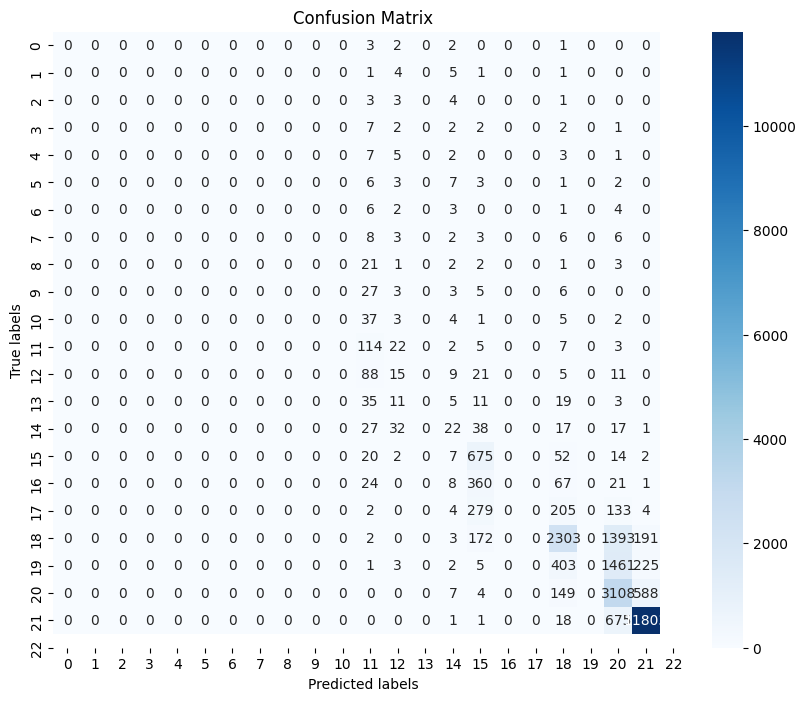

In [ ]:
import torch
import time
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class FFNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.fc5 = nn.Linear(hidden_size, hidden_size)
        self.fc6 = nn.Linear(hidden_size, hidden_size)
        self.fc7 = nn.Linear(hidden_size, hidden_size)
        self.fc8 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.fc2(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.fc3(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.fc4(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.fc5(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.fc6(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.fc7(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.fc8(out)
        return out

def train_ffnn(model, criterion, optimizer, train_loader, val_loader, num_epochs):
    total_step = len(train_loader)
    for epoch in range(num_epochs):
        model.train()
        for i, (inputs, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                       .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for inputs, labels in val_loader:
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            val_accuracy = 100 * correct / total
            print('Validation Accuracy after Epoch {}: {:.2f} %'.format(epoch+1, val_accuracy))

def test_ffnn(model, test_loader, class_label_mapping):
    start_time = time.time()
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        predictions = []
        targets = []
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            predictions.extend(predicted.tolist())
            targets.extend(labels.tolist())
        end_time = time.time()
        accuracy = 100 * correct / total
        precision_macro = precision_score(targets, predictions, average='macro')
        precision_micro = precision_score(targets, predictions, average='micro')
        precision_weighted = precision_score(targets, predictions, average='weighted')
        confusion_mat = confusion_matrix(targets, predictions)

        print('Time taken for testing: {:.2f} seconds'.format(end_time - start_time))
        print('Accuracy of the FFNN on the test dataset: {:.2f} %'.format(accuracy))
        print('Macro Precision of the FFNN on the test dataset: {:.2f}'.format(precision_macro))
        print('Micro Precision of the FFNN on the test dataset: {:.2f}'.format(precision_micro))
        print('Weighted Precision of the FFNN on the test dataset: {:.2f}'.format(precision_weighted))
        print('Confusion Matrix:')
        print(confusion_mat)
        plot_confusion_matrix(confusion_mat, class_label_mapping.values())

def plot_confusion_matrix(confusion_matrix, class_labels):
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

input_size = len(train_dataset[0][0])
hidden_size = 128
num_classes = 22
model = FFNN(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
train_ffnn(model, criterion, optimizer, train_loader, val_loader, num_epochs)
test_ffnn(model, test_loader, class_label_mapping)

Epoch [1/20], Train Loss: 0.9926, Val Loss: 0.8417, Val Accuracy: 70.08%
Epoch [2/20], Train Loss: 0.7843, Val Loss: 0.7708, Val Accuracy: 71.70%
Epoch [3/20], Train Loss: 0.7318, Val Loss: 0.7260, Val Accuracy: 73.11%
Epoch [4/20], Train Loss: 0.6936, Val Loss: 0.6922, Val Accuracy: 73.42%
Epoch [5/20], Train Loss: 0.6640, Val Loss: 0.6712, Val Accuracy: 74.43%
Epoch [6/20], Train Loss: 0.6399, Val Loss: 0.6492, Val Accuracy: 75.34%
Epoch [7/20], Train Loss: 0.6185, Val Loss: 0.6284, Val Accuracy: 76.01%
Epoch [8/20], Train Loss: 0.5998, Val Loss: 0.6192, Val Accuracy: 76.46%
Epoch [9/20], Train Loss: 0.5814, Val Loss: 0.5952, Val Accuracy: 76.97%
Epoch [10/20], Train Loss: 0.5704, Val Loss: 0.6253, Val Accuracy: 75.34%
Epoch [11/20], Train Loss: 0.5568, Val Loss: 0.5931, Val Accuracy: 77.56%
Epoch [12/20], Train Loss: 0.5447, Val Loss: 0.5736, Val Accuracy: 77.93%
Epoch [13/20], Train Loss: 0.5369, Val Loss: 0.5724, Val Accuracy: 77.79%
Epoch [14/20], Train Loss: 0.5267, Val Loss: 0.

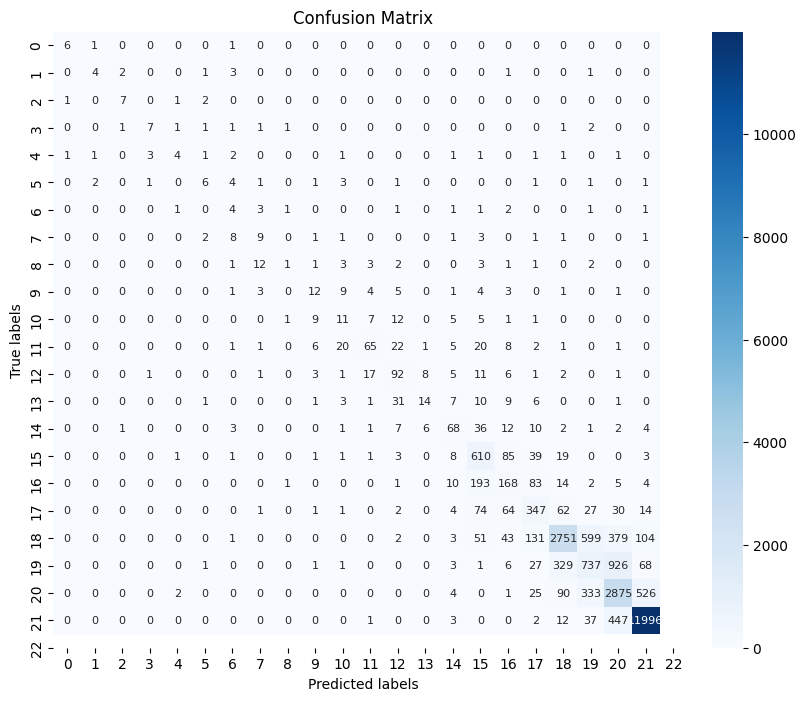

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.utils import class_weight
import time
import matplotlib.pyplot as plt
import seaborn as sns

class CNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * (input_size//4), 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu(out)
        out = self.maxpool(out)
        out = self.conv2(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out

def train_cnn(model, criterion, optimizer, train_loader, val_loader, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        total_train_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
        avg_train_loss = total_train_loss / len(train_loader)

        model.eval()
        total_val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                total_val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        avg_val_loss = total_val_loss / len(val_loader)
        accuracy = 100 * correct / total

        print('Epoch [{}/{}], Train Loss: {:.4f}, Val Loss: {:.4f}, Val Accuracy: {:.2f}%'
              .format(epoch+1, num_epochs, avg_train_loss, avg_val_loss, accuracy))


def test_cnn(model, test_loader, class_label_mapping):
    start_time = time.time()
    with torch.no_grad():
        correct = 0
        total = 0
        predictions = []
        targets = []

        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            predictions.extend(predicted.tolist())
            targets.extend(labels.tolist())
        end_time = time.time()
        accuracy = 100 * correct / total
        precision_macro = precision_score(targets, predictions, average='macro')
        precision_micro = precision_score(targets, predictions, average='micro')
        precision_weighted = precision_score(targets, predictions, average='weighted')
        confusion_mat = confusion_matrix(targets, predictions)

        print('Time taken for testing: {:.2f} seconds'.format(end_time - start_time))
        print('Accuracy of the CNN on the test dataset: {:.2f} %'.format(accuracy))
        print('Macro Precision of the CNN on the test dataset: {:.2f}'.format(precision_macro))
        print('Micro Precision of the CNN on the test dataset: {:.2f}'.format(precision_micro))
        print('Weighted Precision of the CNN on the test dataset: {:.2f}'.format(precision_weighted))
        print('Confusion Matrix:')
        print(confusion_mat)
        plot_confusion_matrix(confusion_mat, class_label_mapping.values())

def plot_confusion_matrix(confusion_matrix, class_labels):
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot_kws={"fontsize": 8})
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

X_train_tensor = torch.tensor(X_train).unsqueeze(1).float()
X_val_tensor = torch.tensor(X_val).unsqueeze(1).float()
X_test_tensor = torch.tensor(X_test).unsqueeze(1).float()
y_train_tensor = torch.tensor(y_train).long()
y_val_tensor = torch.tensor(y_val).long()
y_test_tensor = torch.tensor(y_test).long()

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

num_classes = len(np.unique(y_train))
model = CNN(input_size=X_train.shape[1], num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
train_cnn(model, criterion, optimizer, train_loader, val_loader, num_epochs)

test_cnn(model, test_loader, class_label_mapping)

Epoch [1/20], Train Loss: 0.9824, Val Loss: 0.8084, Val Accuracy: 69.51%
Epoch [2/20], Train Loss: 0.7694, Val Loss: 0.7370, Val Accuracy: 72.05%
Epoch [3/20], Train Loss: 0.7144, Val Loss: 0.6975, Val Accuracy: 73.67%
Epoch [4/20], Train Loss: 0.6796, Val Loss: 0.6816, Val Accuracy: 73.86%
Epoch [5/20], Train Loss: 0.6529, Val Loss: 0.6536, Val Accuracy: 75.05%
Epoch [6/20], Train Loss: 0.6324, Val Loss: 0.6424, Val Accuracy: 75.23%
Epoch [7/20], Train Loss: 0.6147, Val Loss: 0.6366, Val Accuracy: 75.86%
Epoch [8/20], Train Loss: 0.5960, Val Loss: 0.6161, Val Accuracy: 75.88%
Epoch [9/20], Train Loss: 0.5800, Val Loss: 0.5963, Val Accuracy: 77.07%
Epoch [10/20], Train Loss: 0.5680, Val Loss: 0.5973, Val Accuracy: 77.32%
Epoch [11/20], Train Loss: 0.5557, Val Loss: 0.5679, Val Accuracy: 78.06%
Epoch [12/20], Train Loss: 0.5435, Val Loss: 0.5695, Val Accuracy: 77.79%
Epoch [13/20], Train Loss: 0.5354, Val Loss: 0.5600, Val Accuracy: 78.10%
Epoch [14/20], Train Loss: 0.5260, Val Loss: 0.

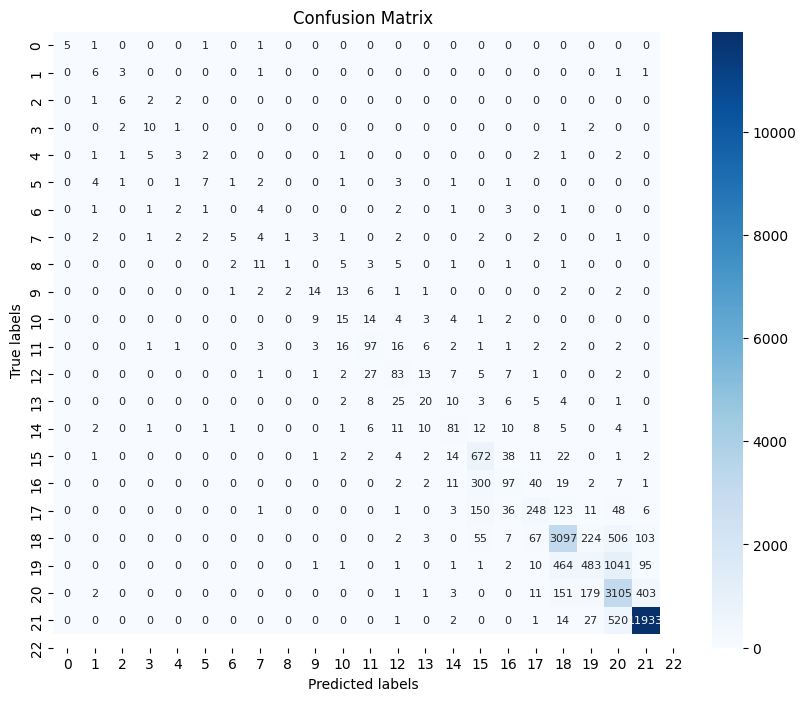

Time taken for testing: 0.68 seconds
Accuracy of the CNN on the test dataset: 78.49 %
Macro Precision of the CNN on the test dataset: 0.46
Micro Precision of the CNN on the test dataset: 0.78
Weighted Precision of the CNN on the test dataset: 0.78
Confusion Matrix:
[[    4     1     0     1     0     1     0     1     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     5     3     0     0     0     0     1     0     0     1     0
      0     0     0     0     0     0     0     0     2     0]
 [    0     1     6     2     1     1     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     2    10     1     0     0     0     0     0     0     0
      0     0     0     0     0     0     1     2     0     0]
 [    0     1     1     5     3     0     0     0     1     0     1     0
      0     0     0     0     1     2     1     0     2     0]
 [    0     4     1     0     1     4     0     5

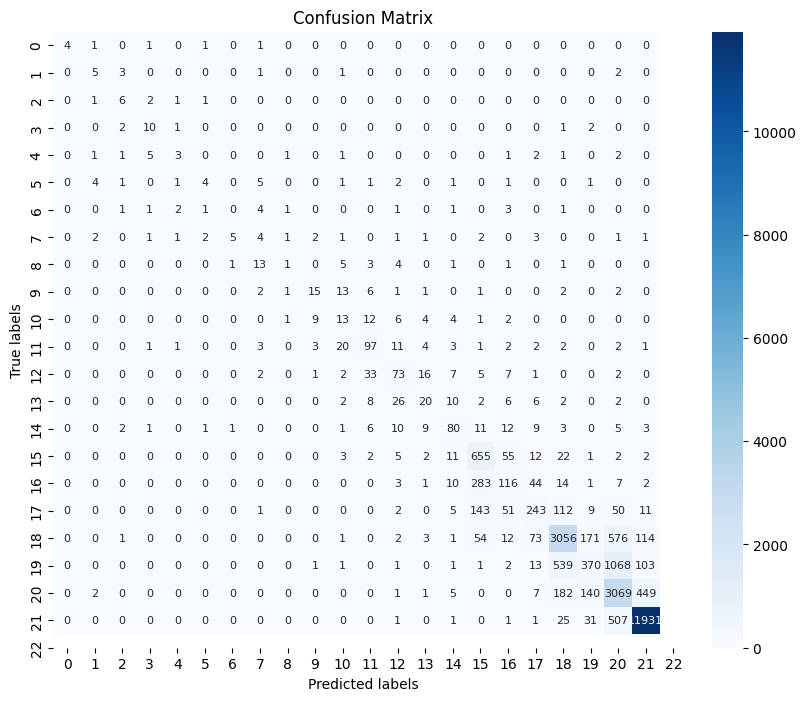

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.utils import class_weight
import time
import matplotlib.pyplot as plt
import seaborn as sns
import torch.quantization

class CNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * (input_size//4), 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu(out)
        out = self.maxpool(out)
        out = self.conv2(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out

def train_cnn(model, criterion, optimizer, train_loader, val_loader, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        total_train_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
        avg_train_loss = total_train_loss / len(train_loader)

        model.eval()
        total_val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                total_val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        avg_val_loss = total_val_loss / len(val_loader)
        accuracy = 100 * correct / total

        print('Epoch [{}/{}], Train Loss: {:.4f}, Val Loss: {:.4f}, Val Accuracy: {:.2f}%'
              .format(epoch+1, num_epochs, avg_train_loss, avg_val_loss, accuracy))


def test_cnn(model, test_loader, class_label_mapping):
    start_time = time.time()
    #model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        predictions = []
        targets = []

        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            predictions.extend(predicted.tolist())
            targets.extend(labels.tolist())
        end_time = time.time()
        accuracy = 100 * correct / total
        precision_macro = precision_score(targets, predictions, average='macro')
        precision_micro = precision_score(targets, predictions, average='micro')
        precision_weighted = precision_score(targets, predictions, average='weighted')
        confusion_mat = confusion_matrix(targets, predictions)

        print('Time taken for testing: {:.2f} seconds'.format(end_time - start_time))
        print('Accuracy of the CNN on the test dataset: {:.2f} %'.format(accuracy))
        print('Macro Precision of the CNN on the test dataset: {:.2f}'.format(precision_macro))
        print('Micro Precision of the CNN on the test dataset: {:.2f}'.format(precision_micro))
        print('Weighted Precision of the CNN on the test dataset: {:.2f}'.format(precision_weighted))
        print('Confusion Matrix:')
        print(confusion_mat)

        plot_confusion_matrix(confusion_mat, class_label_mapping.values())

def plot_confusion_matrix(confusion_matrix, class_labels):
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot_kws={"fontsize": 8})
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

X_train_tensor = torch.tensor(X_train).unsqueeze(1).float()
X_val_tensor = torch.tensor(X_val).unsqueeze(1).float()
X_test_tensor = torch.tensor(X_test).unsqueeze(1).float()
y_train_tensor = torch.tensor(y_train).long()
y_val_tensor = torch.tensor(y_val).long()
y_test_tensor = torch.tensor(y_test).long()

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

num_classes = len(np.unique(y_train))
model = CNN(input_size=X_train.shape[1], num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
train_cnn(model, criterion, optimizer, train_loader, val_loader, num_epochs)

test_cnn(model, test_loader, class_label_mapping)
#quantize the model
quantized_model = torch.quantization.quantize_dynamic(model, {nn.Conv1d, nn.Linear}, dtype=torch.qint8)

#test the quantized model
test_cnn(quantized_model, test_loader, class_label_mapping)